<a href="https://colab.research.google.com/github/alfiZh/Anemia-Classification/blob/main/Anemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import preprocessing

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/anemia.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data=pd.read_csv('/content/anemia.csv')

In [ ]:
data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [ ]:
data.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

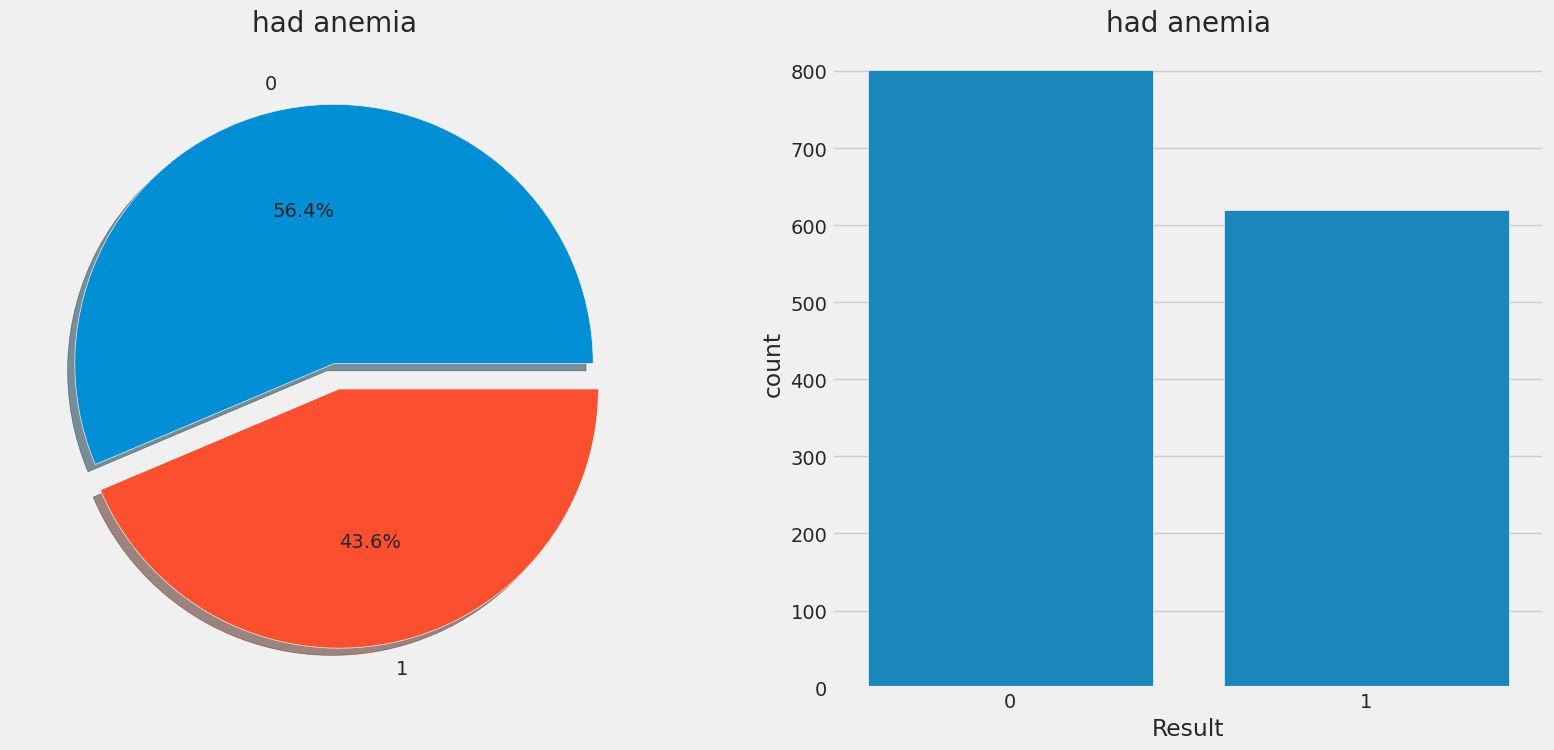

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Result'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('had anemia')
ax[0].set_ylabel('')
sns.countplot(x='Result',data=data,ax=ax[1])
ax[1].set_title('had anemia')
plt.show()


In [12]:
data.groupby(['Gender','Result'])['Result'].count()

Gender  Result
0       0         473
        1         208
1       0         328
        1         412
Name: Result, dtype: int64

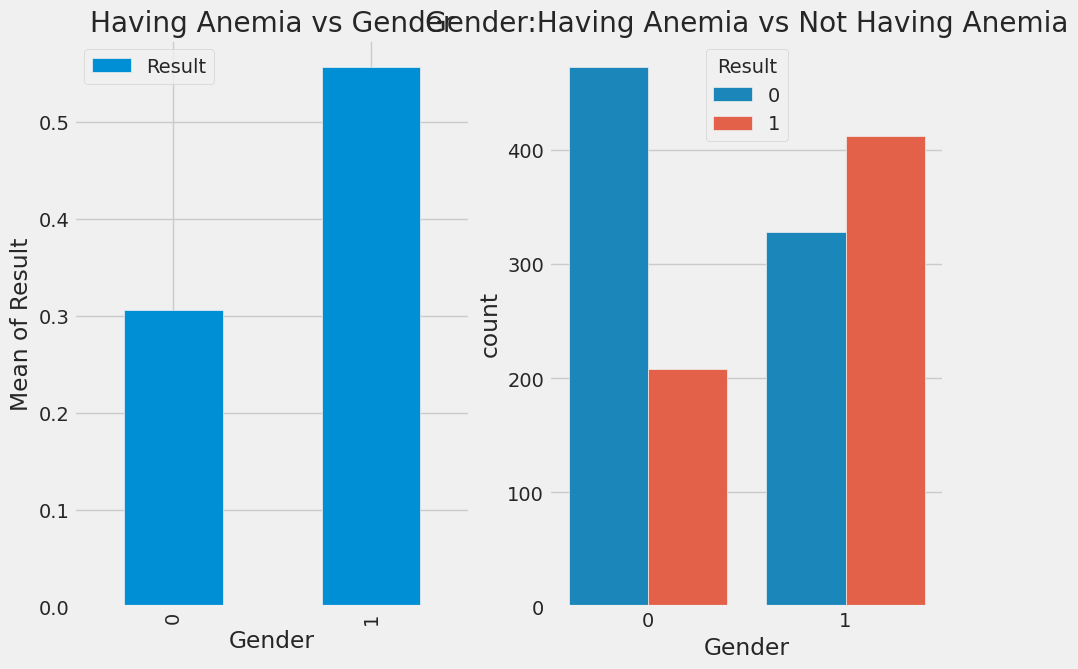

In [20]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['Gender','Result']].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Having Anemia vs Gender')
ax[0].set_ylabel('Mean of Result')
sns.countplot(x='Gender', hue='Result', data=data, ax=ax[1])
ax[1].set_title('Gender:Having Anemia vs Not Having Anemia')
plt.show()




In [22]:
# See the min, max, mean values
print('The highest hemoglobin was of:',data['Hemoglobin'].max())
print('The lowest hemoglobin was of:',data['Hemoglobin'].min())
print('The average hemoglobin in the data:',data['Hemoglobin'].mean())

The highest hemoglobin was of: 16.9
The lowest hemoglobin was of: 6.6
The average hemoglobin in the data: 13.412737508796623


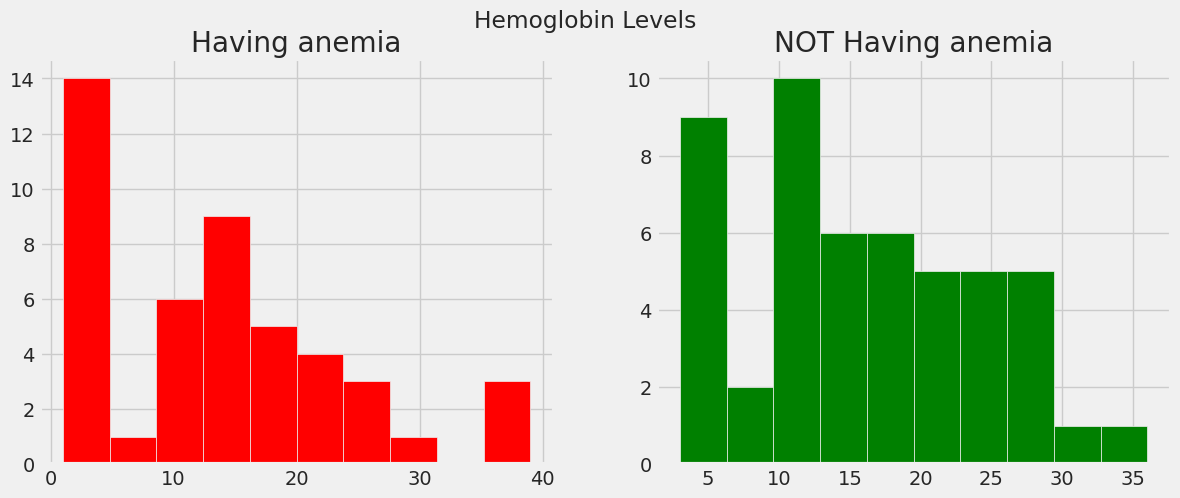

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['Result']==1]['Hemoglobin'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=data[data['Result']==0]['Hemoglobin'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('Hemoglobin Levels')
plt.show()

In [24]:
# See the min, max, mean values
print('The highest MCHC was of:',data['MCHC'].max())
print('The lowest MCHC was of:',data['MCHC'].min())
print('The average MCHC in the data:',data['MCHC'].mean())

The highest MCHC was of: 32.5
The lowest MCHC was of: 27.8
The average MCHC in the data: 30.251231527093594


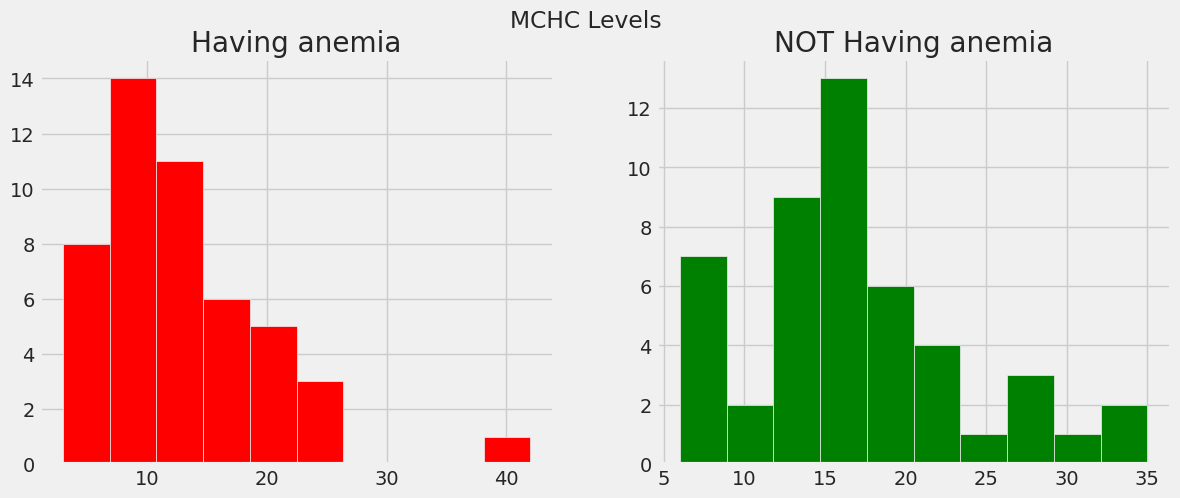

In [25]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['Result']==1]['MCHC'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=data[data['Result']==0]['MCHC'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCHC Levels')
plt.show()

In [26]:
# See the min, max, mean values
print('The highest MCV was of:',data['MCV'].max())
print('The lowest MCV was of:',data['MCV'].min())
print('The average MCV in the data:',data['MCV'].mean())

The highest MCV was of: 101.6
The lowest MCV was of: 69.4
The average MCV in the data: 85.5237860661506


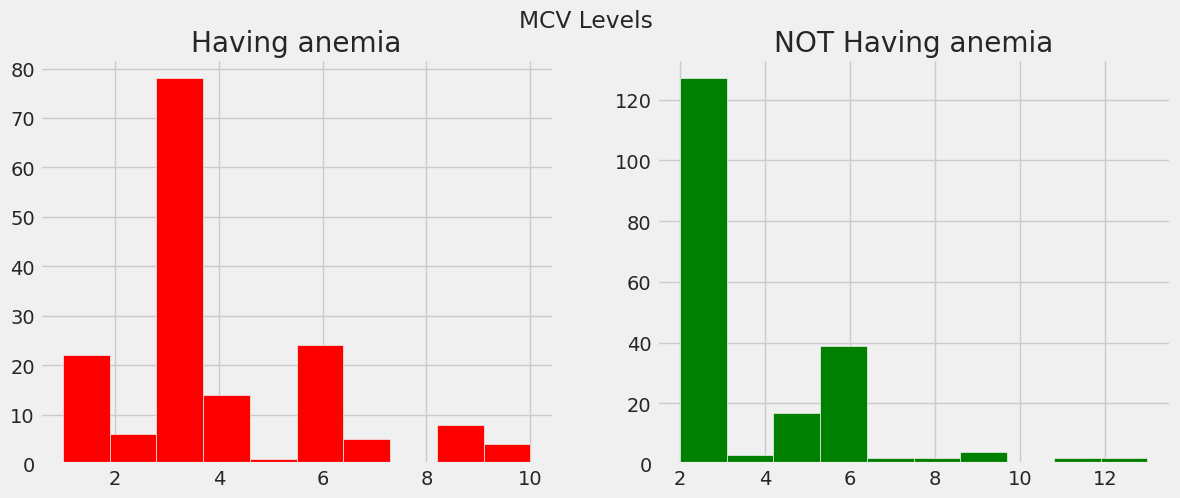

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['Result']==1]['MCV'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=data[data['Result']==0]['MCV'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCV Levels')
plt.show()

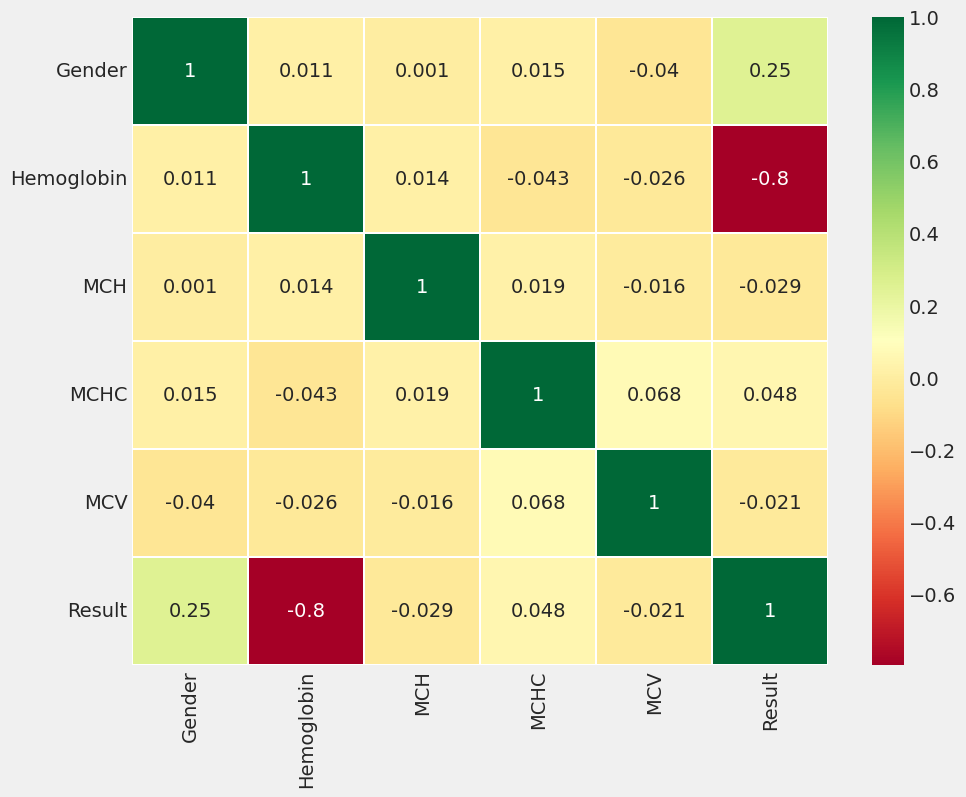

In [28]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [30]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(data.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["Hemoglobin", "MCH", "MCHC", "MCV"])
scaled_df.head()

,Hemoglobin,MCH,MCHC,MCV
0,0.029155,0.025904,0.025491,0.025799
1,0.031112,0.028985,0.024790,0.022193
2,0.017611,0.024535,0.025929,0.021946
3,0.029155,0.018258,0.027506,0.026970
4,0.028764,0.025105,0.024703,0.030669


In [31]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [41]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Result'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data['Result']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(994, 994, 427, 427)

In [42]:
print("Data Train:")
print(train.head())  # Menampilkan lima baris pertama dari data training
print("\nData Test:")
print(test.head())  # Menampilkan lima baris pertama dari data testing


Data Train:
     Gender  Hemoglobin   MCH  MCHC    MCV  Result
941       1        13.2  20.1  28.8   91.2       1
856       1        16.8  22.7  32.0   94.3       0
654       1        10.5  25.3  27.9   77.1       1
377       1        13.7  23.5  29.0   70.6       0
872       0        13.3  26.3  30.0  100.0       0

Data Test:
      Gender  Hemoglobin   MCH  MCHC    MCV  Result
968        0        14.0  27.4  31.8   87.2       0
1375       1        15.3  28.9  31.6   76.3       0
595        0        12.2  23.3  30.4  100.2       0
842        1        12.2  23.4  32.0   86.0       1
983        1        14.9  22.4  29.9   80.6       0


In [43]:
print("Jumlah data pada set data training:", train.shape[0])
print("Jumlah data pada set data testing:", test.shape[0])


Jumlah data pada set data training: 994
Jumlah data pada set data testing: 427


In [44]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.9648711943793911


In [45]:
from sklearn.metrics import classification_report

# Melakukan prediksi dengan model yang telah dilatih
prediction = model.predict(test_X)

# Mencetak laporan klasifikasi
print(classification_report(test_Y, prediction))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       241
           1       0.96      0.96      0.96       186

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427

